In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
train = pd.read_csv("./train.csv")
train["target"] = train["target"].astype(int)
train = shuffle(train)
train.head()

,Station,Ob,value,measure,target,R_flag,I_flag,Z_flag,B_flag
4283021,PLYM,3/14/2021 3:31,0.214,sm,0,0,-1,-1,2
3645135,MITC,9/17/2021 20:36,0.900,ws02,0,0,0,0,-1
3335632,LILE,11/13/2021 9:19,754.000,par,0,3,0,-1,-1
2151033,FLET,5/12/2021 3:53,0.417,sm,0,0,-1,-1,1
6233259,WINE,10/23/2021 5:42,16.700,rh_wxt,0,0,-1,0,2


In [3]:
train.info

<bound method DataFrame.info of         Station               Ob    value measure  target  R_flag  I_flag  \
4283021    PLYM   3/14/2021 3:31    0.214      sm       0       0      -1   
3645135    MITC  9/17/2021 20:36    0.900    ws02       0       0       0   
3335632    LILE  11/13/2021 9:19  754.000     par       0       3       0   
2151033    FLET   5/12/2021 3:53    0.417      sm       0       0      -1   
6233259    WINE  10/23/2021 5:42   16.700  rh_wxt       0       0      -1   
...         ...              ...      ...     ...     ...     ...     ...   
3961611    NEWL  2/12/2021 14:28    0.660      sm       1       0      -1   
2549071    FRYI   12/5/2021 5:16    0.232      sm       0       0      -1   
5330234    SPIN   2/9/2021 16:13  287.200      sr       0       1       0   
3259670    LEWS  6/20/2021 12:46  119.100     par       0       3       0   
5839276    UNCA   8/27/2021 5:54    0.000    ws02       0       0      -1   

         Z_flag  B_flag  
4283021      -1  

In [4]:
synthetic_true = pd.read_csv("./Synthetic_true_complete.csv")
synthetic_true["target"] = synthetic_true["target"].astype(int)
synthetic_true = shuffle(synthetic_true)

synthetic_true.head()

,Unnamed: 0,Station,Ob,value,measure,target,R_flag,I_flag,Z_flag,B_flag
550298,10298,REID,2/12/2021 4:59,82.759243,temp_wxt,1,0,-1,-1,-1
223628,13628,SPRU,3/8/2021 11:09,11.399484,ws02,1,0,0,2,-1
409386,19386,MITC,2/9/2021 2:19,934.826178,ws02,1,1,-1,0,-1
289980,19980,SASS,4/6/2021 11:03,9.850779,temp10,1,0,-1,-1,-1
613673,13673,SASS,1/29/2021 23:06,14.174534,temp10,1,0,-1,0,-1


In [5]:
synthetic_true = synthetic_true.drop(columns=['Unnamed: 0'])

In [6]:
# Correlation Plot
corr_score = train[['value', 'R_flag', 'I_flag', 'Z_flag','B_flag']].corr()
corr_score

,value,R_flag,I_flag,Z_flag,B_flag
value,1.000000,0.333934,0.247016,-0.041498,-0.344395
R_flag,0.333934,1.000000,0.071795,-0.131722,-0.420809
I_flag,0.247016,0.071795,1.000000,0.220663,-0.576011
Z_flag,-0.041498,-0.131722,0.220663,1.000000,-0.336325
B_flag,-0.344395,-0.420809,-0.576011,-0.336325,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

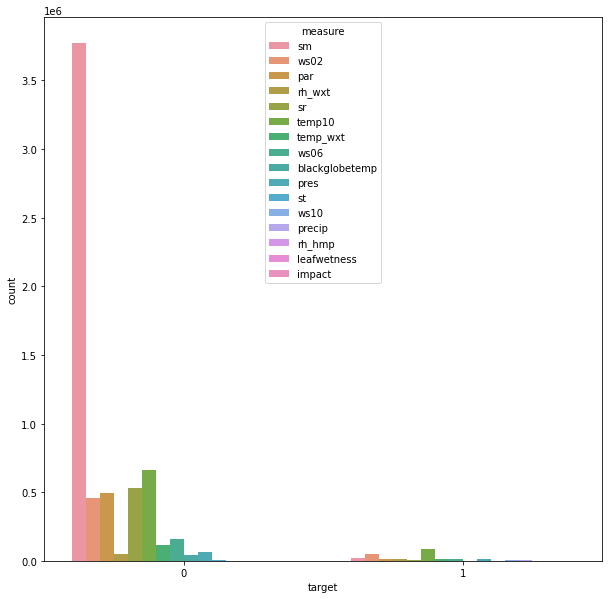

In [7]:
# Categorial Feature
_,axss = plt.subplots(figsize=[10,10])
sns.countplot(x='target', hue='measure', data=train)


<AxesSubplot:xlabel='target', ylabel='count'>

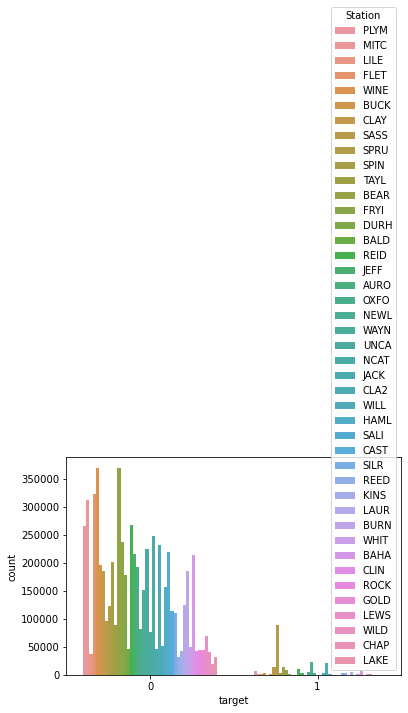

In [8]:
sns.countplot(x='target', hue='Station', data=train)


In [9]:
y_train = train.iloc[:, 4]
y_synthetic_true = synthetic_true.iloc[:, 4]

In [10]:
y_synthetic_true

550298    1
223628    1
409386    1
289980    1
613673    1
         ..
570506    1
132973    1
591813    1
24287     1
18310     1
Name: target, Length: 630000, dtype: int64

In [11]:
# drop target and Ob
drop_target=['target', 'Ob']
X_train = train.drop(drop_target, axis=1)
x_synthetic_true = synthetic_true.drop(drop_target, axis=1)

In [12]:
# Split categorical var and numerical var
X_train.dtypes

Station     object
value      float64
measure     object
R_flag       int64
I_flag       int64
Z_flag       int64
B_flag       int64
dtype: object

In [13]:
x_synthetic_true.dtypes

Station     object
value      float64
measure     object
R_flag       int64
I_flag       int64
Z_flag       int64
B_flag       int64
dtype: object

In [14]:
cat_cols = X_train.columns[X_train.dtypes == 'O']
num_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')]

In [15]:
!pip install imbalanced-learn


In [16]:
import imblearn
print(imblearn.__version__)

0.9.0


In [17]:
# random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# summarize class distribution
print(Counter(y_train))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.272)
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

Counter({0: 6358102, 1: 235172})
Counter({0: 864602, 1: 235172})


In [18]:
# combine undersample data with synthetic true
X = pd.concat([X_over, x_synthetic_true])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729774 entries, 0 to 18310
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Station  object 
 1   value    float64
 2   measure  object 
 3   R_flag   int64  
 4   I_flag   int64  
 5   Z_flag   int64  
 6   B_flag   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 105.6+ MB


In [19]:
# Verify the numbers of true class and false class. We have roughtly 1:1 ratio
y = pd.concat([y_over, y_synthetic_true])
print(Counter(y))

Counter({1: 865172, 0: 864602})


In [20]:
cat_cols = X_train.columns[X_train.dtypes == 'O']
num_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')]

In [21]:
# split dataset
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.40, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 1037864 observation with 7 features
test data has 691910 observation with 7 features


In [22]:
X_train.dtypes

Station     object
value      float64
measure     object
R_flag       int64
I_flag       int64
Z_flag       int64
B_flag       int64
dtype: object

In [23]:
# One hot encoding for Station
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Station']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [24]:
X_train.dtypes

value           float64
measure          object
R_flag            int64
I_flag            int64
Z_flag            int64
B_flag            int64
Station_AURO    float64
Station_BAHA    float64
Station_BALD    float64
Station_BEAR    float64
Station_BUCK    float64
Station_BURN    float64
Station_CAST    float64
Station_CHAP    float64
Station_CLA2    float64
Station_CLAY    float64
Station_CLIN    float64
Station_DURH    float64
Station_FLET    float64
Station_FRYI    float64
Station_GOLD    float64
Station_HAML    float64
Station_JACK    float64
Station_JEFF    float64
Station_KINS    float64
Station_LAKE    float64
Station_LAUR    float64
Station_LEWS    float64
Station_LILE    float64
Station_MITC    float64
Station_NCAT    float64
Station_NEWL    float64
Station_OXFO    float64
Station_PLYM    float64
Station_REED    float64
Station_REID    float64
Station_ROCK    float64
Station_SALI    float64
Station_SASS    float64
Station_SILR    float64
Station_SPIN    float64
Station_SPRU    

In [25]:
# One hot encoding for measure
categories = ['measure']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [26]:
# Standardize and Normalize Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [27]:
X_train

,value,R_flag,I_flag,Z_flag,B_flag,Station_AURO,Station_BAHA,Station_BALD,Station_BEAR,Station_BUCK,...,measure_rh_hmp,measure_rh_wxt,measure_sm,measure_sr,measure_st,measure_temp10,measure_temp_wxt,measure_ws02,measure_ws06,measure_ws10
0,-0.347576,-0.369060,-0.532594,2.970063,-0.999270,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.347576,-0.369060,-0.532594,2.970063,-0.999270,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.346690,-0.369060,-0.532594,-0.477349,0.687490,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.346855,-0.369060,-0.532594,-0.477349,1.530871,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.295954,-0.369060,-0.532594,-0.477349,-0.155890,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037859,-0.256206,0.620835,-0.532594,-0.477349,-0.999270,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037860,-0.346693,-0.369060,-0.532594,-0.477349,1.530871,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037861,-0.346709,-0.369060,-0.532594,-0.477349,1.530871,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037862,-0.345799,-0.369060,-0.532594,-0.477349,0.687490,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
classifier_logistic = LogisticRegression(solver='lbfgs', max_iter=3000)

# Naive Bayes
classifier_bayes=GaussianNB()

# Random Forest
classifier_RF = RandomForestClassifier(max_depth=10, n_estimators=100)

In [29]:
# Logistics
classifier_logistic.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [30]:
classifier_logistic.score(X_test, y_test)


0.8614487433336706

In [31]:
# naive Bayes

In [32]:
classifier_bayes.fit(X_train, y_train)

GaussianNB()

In [33]:
classifier_bayes.predict(X_test)


array([1, 0, 0, ..., 1, 0, 1])

In [34]:
classifier_bayes.score(X_test, y_test)


0.7647179546472808

In [35]:
# Random Forest
classifier_RF.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

In [36]:
classifier_RF.predict(X_test)


array([1, 0, 0, ..., 1, 0, 1])

In [37]:
classifier_RF.score(X_test, y_test)


0.9656516020869766

In [38]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','Random Forest','Naive Bayes']
model_list = [classifier_logistic, classifier_RF, classifier_bayes]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.86105129 0.86249657 0.86092122 0.86019376 0.86227911]
Model accuracy of Logistic Regression is 0.861388390859228
[0.96731752 0.96785227 0.96603123 0.9660794  0.96487966]
Model accuracy of Random Forest is 0.9664320165721516
[0.76683384 0.76585105 0.76426607 0.76830802 0.7626414 ]
Model accuracy of Naive Bayes is 0.7655800731707849


In [40]:
#Loss/cost function --> (wx + b - y) ^2 + ƛ * |w| --> ƛ is a hyperparameter

from sklearn.model_selection import GridSearchCV
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))
        

# Not as good as default, so we will just stay with default RF classfier

In [44]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1),
                         'penalty': ('l1', 'l2')})

In [45]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8614288585547545
Best parameters set:
C:1
penalty:l1


In [46]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [47]:
best_LR_model.predict(X_test)


array([0, 0, 0, ..., 0, 0, 1])

In [48]:
best_LR_model.score(X_test, y_test)


0.8614718677284618

In [49]:
# Find Hyperparameter for ramdom forest
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [5,10,15]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [60, 80, 100]})

In [50]:
print_grid_search_metrics(Grid_RF)


Best score: 0.9803924212648021
Best parameters set:
max_depth:15
n_estimators:60


In [51]:
best_RF_model = Grid_RF.best_estimator_


In [52]:
best_RF_model


RandomForestClassifier(max_depth=15, n_estimators=60)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [54]:
def train_evaluate_pipeline(X_train, y_train, X_test, y_test, model, digits=4):

    Y_test_predicted = model.fit(X=X_train, y=y_train).predict(X_test)
    metric = classification_report(y_test,Y_test_predicted,digits=digits)
    
    return metric

In [56]:
# Confusion matrix, accuracy, precison and recall for Logistic Regression

print("Logistic Regression Classifer")
LR_metrics = train_evaluate_pipeline(X_train, y_train, X_test, y_test, best_LR_model)
print(LR_metrics)

Logistic Regression Classifer
              precision    recall  f1-score   support

           0     0.8811    0.8357    0.8578    345915
           1     0.8438    0.8872    0.8650    345995

    accuracy                         0.8615    691910
   macro avg     0.8624    0.8615    0.8614    691910
weighted avg     0.8624    0.8615    0.8614    691910



In [57]:
# Confusion matrix, accuracy, precison and recall for Naive Bayes

print("Naive Bayes Classifer")
NB_metrics = train_evaluate_pipeline(X_train, y_train, X_test, y_test, classifier_bayes)
print(NB_metrics)

Naive Bayes Classifer
              precision    recall  f1-score   support

           0     0.9150    0.5836    0.7127    345915
           1     0.6944    0.9458    0.8008    345995

    accuracy                         0.7647    691910
   macro avg     0.8047    0.7647    0.7567    691910
weighted avg     0.8047    0.7647    0.7567    691910



In [58]:
# Confusion matrix, accuracy, precison and recall for random forest

print("Random Forest Classifer")
RF_metrics = train_evaluate_pipeline(X_train, y_train, X_test, y_test, best_RF_model)
print(RF_metrics)


Random Forest Classifer
              precision    recall  f1-score   support

           0     0.9797    0.9794    0.9795    345915
           1     0.9794    0.9797    0.9795    345995

    accuracy                         0.9795    691910
   macro avg     0.9795    0.9795    0.9795    691910
weighted avg     0.9795    0.9795    0.9795    691910



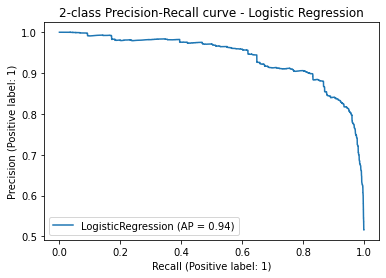

In [59]:
# Plot the Precision-Recall curve to evaulate
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

# PR curve for Logistic Regression
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    best_LR_model, X_test, y_test
)
_ = display.ax_.set_title("2-class Precision-Recall curve - Logistic Regression")

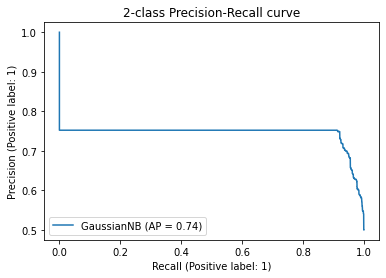

In [60]:
# PR Curve for Naive Bayes
display = PrecisionRecallDisplay.from_estimator(
    classifier_bayes, X_test, y_test
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


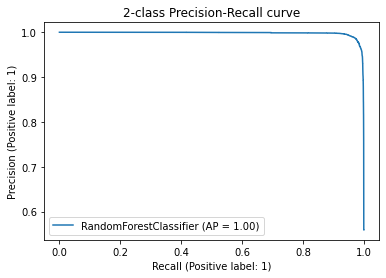

In [61]:
# PR Curve for Random Forest
display = PrecisionRecallDisplay.from_estimator(
    best_RF_model, X_test, y_test
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [ ]:
test = pd.read_csv("./test.csv")
test.head()

In [ ]:
drop_feature=['Ob']
test = test.drop(drop_feature, axis=1)

In [ ]:
test

In [ ]:
cat_cols = test.columns[test.dtypes == 'O']
num_cols = test.columns[(test.dtypes == 'float64') | (test.dtypes == 'int64')]

In [ ]:
categories = ['Station']
enc_ohe = OneHotEncoder()
enc_ohe.fit(test[categories])

test = OneHotEncoding(test, enc_ohe, categories)

In [ ]:
test

In [ ]:
categories = ['measure']
enc_ohe = OneHotEncoder()
enc_ohe.fit(test[categories])

test = OneHotEncoding(test, enc_ohe, categories)

In [ ]:
test

In [ ]:
scaler = StandardScaler()
scaler.fit(test[num_cols])
test[num_cols] = scaler.transform(test[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

In [ ]:
test

In [ ]:
test_list = test.columns.values.tolist()


In [ ]:
test_list

In [ ]:
train_list = X_train.columns.values.tolist()
train_list

In [ ]:
drop_feature=['measure_gust02', 'measure_gust10', 'measure_wd02', 'measure_wd10']
test = test.drop(drop_feature, axis=1)

In [ ]:
test_list = test.columns.values.tolist()
test_list

In [ ]:
train_list = X_train.columns.values.tolist()
train_list

In [ ]:
test_pred = classifier_RF.predict_proba(test)

In [ ]:
pd.DataFrame(test_pred[:,1], columns=['target']).to_csv('predictions.csv', index=False)

In [ ]:
test_pred = classifier_logistic.predict_proba(test)

In [ ]:
pd.DataFrame(test_pred[:,1], columns=['target']).to_csv('predictions.csv', index=False)

In [ ]:
test_pred = classifier_bayes.predict_proba(test)

In [ ]:
pd.DataFrame(test_pred[:,1], columns=['target']).to_csv('predictions.csv', index=False)

In [ ]:
# Github Reference: https://github.com/Kaiyuan-Carl-Duan/Bank-Customer-Churn-Prediction
# Precision-Recall curve https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
# Random Undersampling: https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
